**Import Necessary Libraries**

In [1]:
#Importing necessary libraries
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set()
import warnings; warnings.simplefilter('ignore')

In [2]:
#Reading Data set
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet'
response = requests.get(url)
df = pd.read_parquet(BytesIO(response.content))

**Explore Data**

In [3]:
#Exploring Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t

'ehail_fee' contains null value. 

In [4]:
#Dropping null column
df=df.drop('ehail_fee', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t

In [6]:
#Adding trip ID Column 
prefix = "TripID_"
df.insert(0, "trip_id", prefix + df.index.astype(str))

In [7]:
df.head()

,trip_id,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,TripID_0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,0.3,4.80,2.0,1.0,0.00
1,TripID_1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,0.3,10.80,2.0,1.0,0.00
2,TripID_2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,0.3,23.15,1.0,1.0,2.75
3,TripID_3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,0.3,9.30,2.0,1.0,0.00
4,TripID_4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0,1.0,2.75


In [8]:
df.tail()

,trip_id,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
62490,TripID_62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,0.0,0.0,1.93,0.0,0.3,10.61,NaN,NaN,NaN
62491,TripID_62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,0.0,0.0,0.00,0.0,0.3,15.22,NaN,NaN,NaN
62492,TripID_62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,0.0,0.0,0.00,0.0,0.3,16.56,NaN,NaN,NaN
62493,TripID_62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,0.0,0.0,2.17,0.0,0.3,11.95,NaN,NaN,NaN
62494,TripID_62494,2,2022-01-31 23:52:00,2022-02-01 00:26:00,None,NaN,225,179,NaN,9.60,32.18,0.0,0.0,7.23,10.0,0.3,49.71,NaN,NaN,NaN


**Column Details**
<br> trip_id- a unique identifier for each trip
<br> VendorID- a code indicating the provider associated with the trip record
<br> lpep_pickup_datetime - date and time when the meter was engaged
<br> lpep_dropoff_datetime- date and time when the meter was disengaged
<br> store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
<br> RatecodeID- The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride 
<br> PULocationID- Taxi Zone in which the taximeter was engaged
<br> DOLocationID- Taxi Zone in which the taximeter was disengaged
<br> passenger_count - the number of passengers in the vehicle (driver entered value)
<br> trip_distance- The elapsed trip distance in miles reported by the taximeter.
<br> fare_amount- The time-and-distance fare calculated by the meter.
<br> extra- Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
<br> mta_tax-$0.50 MTA tax that is automatically triggered based on the metered rate in use.


<br> tip_amount- 	Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
<br> tolls_amount- Total amount of all tolls paid in trip.
<br> improvement_surcharge- $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. 
<br> total_amount- The total amount charged to passengers. Does not include cash tips.
<br> payment_type- A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip


<br> trip_type- type of the trip. Contains values 1 & 2
<br> congestion_surcharge- New York State has imposed a new Congestion surcharge for some vehicles that charge to transport people for trips that both begin and end in New York State and that begin in, end in, or pass through Manhattan south of (but not including) 96th Street.

These column details can be found at <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">this link</a>

In [10]:
#check for unique values of all columns.
df.nunique()

trip_id                  62495
VendorID                     2
lpep_pickup_datetime     60635
lpep_dropoff_datetime    60610
store_and_fwd_flag           2
RatecodeID                   5
PULocationID               231
DOLocationID               240
passenger_count              9
trip_distance             1961
fare_amount               2678
extra                       10
mta_tax                      3
tip_amount                1301
tolls_amount                29
improvement_surcharge        3
total_amount              4026
payment_type                 5
trip_type                    2
congestion_surcharge         3
dtype: int64

**'trip_id' has 62495 unique values which represents each trip has unique identifier which is expected.
'VendorID' contains 2 unique values. From this, it can be assumed that there are two vendors.

**'lpep_pickup_datetime' and 'lpep_dropoff_datetime' are of data type datetime64[ns].
New features from these can be created.**


In [11]:
#let us extract and create new features from datetime
df['pickup_day']=df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['lpep_dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['lpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['lpep_dropoff_datetime'].dt.weekday
df['pickup_hour']=df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['lpep_dropoff_datetime'].dt.hour
df['pickup_month']=df['lpep_pickup_datetime'].dt.month
df['dropoff_month']=df['lpep_dropoff_datetime'].dt.month

The following features have been created:
​
* pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
* pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
* pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
* pickup_month and dropoff_month with month number with January=1 and December=12.
​
<br> Now from 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' a new feature **'trip_duration'** can be created for further analysis.

In [12]:
#Create a new variable 'trip_duration'
df['trip_duration']= df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [13]:
df.trip_duration.value_counts()

0 days 00:12:00    358
0 days 00:15:00    321
0 days 00:13:00    304
0 days 00:18:00    292
0 days 00:14:00    286
                  ... 
0 days 00:58:02      1
0 days 00:49:56      1
0 days 03:23:04      1
0 days 01:22:28      1
0 days 02:26:00      1
Name: trip_duration, Length: 3815, dtype: int64

In [14]:
#Convert trip_duration into minutes
df['trip_duration']=df.trip_duration.dt.total_seconds()/60.0

In [161]:
np.round(df.trip_duration.describe(),2)

count    55979.00
mean        18.98
std         82.33
min          0.00
25%          6.72
50%         11.03
75%         17.32
max       1439.47
Name: trip_duration, dtype: float64

**The distribution of Pickup and Drop Off hours of the day**

The time part is represented by hours,minutes and seconds which is difficult for the analysis,
<br>thus we divide the times into 4 time zones: morning (6 hrs to 10 hrs) , midday (10 hrs to 16 hrs) ,
<br>evening (16 hrs to 22 hrs) and late night (22 hrs to 6 hrs)



In [160]:
def time_of_day(x):
    if x>=datetime.time(6, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(6, 0, 0):
        return 'late night'

In [159]:
import datetime
df['pickup_time_of_day']=df['lpep_pickup_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_time_of_day']=df['lpep_dropoff_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

**Now from 'trip_distance' and 'trip_duration' a new feature 'vehicle_speed' can be created for further data analysis.**

In [158]:
##Calculate vehicle_speed in miles/hr for further insights
df['vehicle_speed'] = (df.trip_distance/(df.trip_duration/3600))

In [157]:
df.head()

,trip_id,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,trip_duration,pickup_time_of_day,dropoff_time_of_day,vehicle_speed,pickup_time_bins
0,TripID_0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,...,5,0,0,1,1,1.200000,late night,late night,1320.000000,NaN
1,TripID_1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,...,5,0,0,1,1,8.716667,late night,late night,867.304015,NaN
2,TripID_2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,...,5,0,1,1,1,16.200000,late night,late night,822.222222,NaN
3,TripID_3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,...,5,0,0,1,1,8.250000,late night,late night,737.454545,NaN
4,TripID_4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,...,5,0,0,1,1,21.033333,late night,late night,1071.442155,NaN


In [149]:
df['pickup_month'].value_counts()

1     55976
12        3
Name: pickup_month, dtype: int64

**'pickup_month' only contains values of the month January (1) and December(12).**

In [150]:
df['dropoff_month'].value_counts()

1     55967
2        10
12        2
Name: dropoff_month, dtype: int64

**'dropoff_month' only contains values of the month January (1), February(2) and December(12).** 
<br> There might be a possibility that a trip started on the last day of January and ended in February.

In [148]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

trip_id : ['TripID_0' 'TripID_1' 'TripID_2' ... 'TripID_56197' 'TripID_56198'
 'TripID_56199']
VendorID : [2 1]
lpep_pickup_datetime : ['2022-01-01T00:14:21.000000000' '2022-01-01T00:20:55.000000000'
 '2022-01-01T00:57:02.000000000' ... '2022-01-31T23:35:02.000000000'
 '2022-01-31T23:39:20.000000000' '2022-01-31T23:52:49.000000000']
lpep_dropoff_datetime : ['2022-01-01T00:15:33.000000000' '2022-01-01T00:29:38.000000000'
 '2022-01-01T01:13:14.000000000' ... '2022-01-31T23:40:52.000000000'
 '2022-01-31T23:52:25.000000000' '2022-02-01T00:01:25.000000000']
store_and_fwd_flag : ['N' 'Y']
RatecodeID : [1. 5. 4. 3. 2.]
PULocationID : [ 42 116  41 181  33 150  66  40 112 256  75  74 213  51 185 129  82 235
 255  95 240  97  55 168 159 166 130   7  25  43  29  80  92 119 260 226
 215 228  83 146  36 179  61 108 250  69  85  71 173 212  91 182 264 236
 244 210  89  28  17 205 197 225 198 145 169  22 223  18 247 263  70  24
  65 219 132 134 196 121 131  35 152  76  21 189 171 177 175 243  98 191


**It can be noticed that there are no wrong entries like symbols -,?,#,*,etc. 
<br>Also it is visible that some entries contain vavlues with 'NAN'. 
<br>These values might have been replaced by 'NAN' for containing wrong entries.**

In [41]:
df['passenger_count'].value_counts()

1.0    48910
2.0     4243
5.0     1086
6.0      805
3.0      728
0.0      214
4.0      207
8.0        5
7.0        2
Name: passenger_count, dtype: int64

**214 entries with 0 passenger count**. Most of the trips contains 1 passenger. These are clearly outliers. 



In [135]:
#Let us remove the rows which have 0 or 7 or 9 passenger count.
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [136]:
df['passenger_count'].value_counts()

1.0    48910
2.0     4243
5.0     1086
6.0      805
3.0      728
4.0      207
Name: passenger_count, dtype: int64

**Now, that seems like a fair distribution.**

In [162]:
df.isnull().sum()

trip_id                     0
VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
pickup_day                  0
dropoff_day                 0
pickup_day_no               0
dropoff_day_no              0
pickup_hour                 0
dropoff_hour                0
pickup_month                0
dropoff_month               0
trip_duration               0
pickup_time_of_day          0
dropoff_time_of_day         0
vehicle_speed              66
pickup_time_bins         1379
dtype: int

**We can observe that now there are missing values in some columns.**

**Visualizing the missing values**

In [154]:
#Dropping null column
#df=df.drop('store_and_fwd_flag_NAN', axis=1)
#df=df.drop('RatecodeID_NAN', axis=1)
#df=df.drop('payment_type_NAN', axis=1)
#df=df.drop('trip_type_NAN', axis=1)
#df=df.drop('congestion_surcharge_NAN', axis=1)
df=df.drop('passenger_count_NAN', axis=1)


<AxesSubplot:>

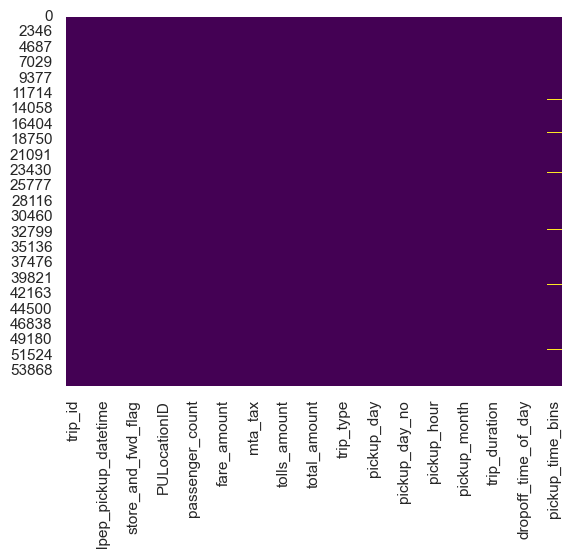

In [155]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

**Capturing NAN with a new feature**

Advantages:

It captures the importance of missing values which will help model understand the data better

Disadvantages:

Curse of Dimensionality

**Theses attributes were removed after carefully observing 'passenger_count'. After dropping the rows containing values 0, 7 or 9 these 'NAN' values were also removed.**

<AxesSubplot:>

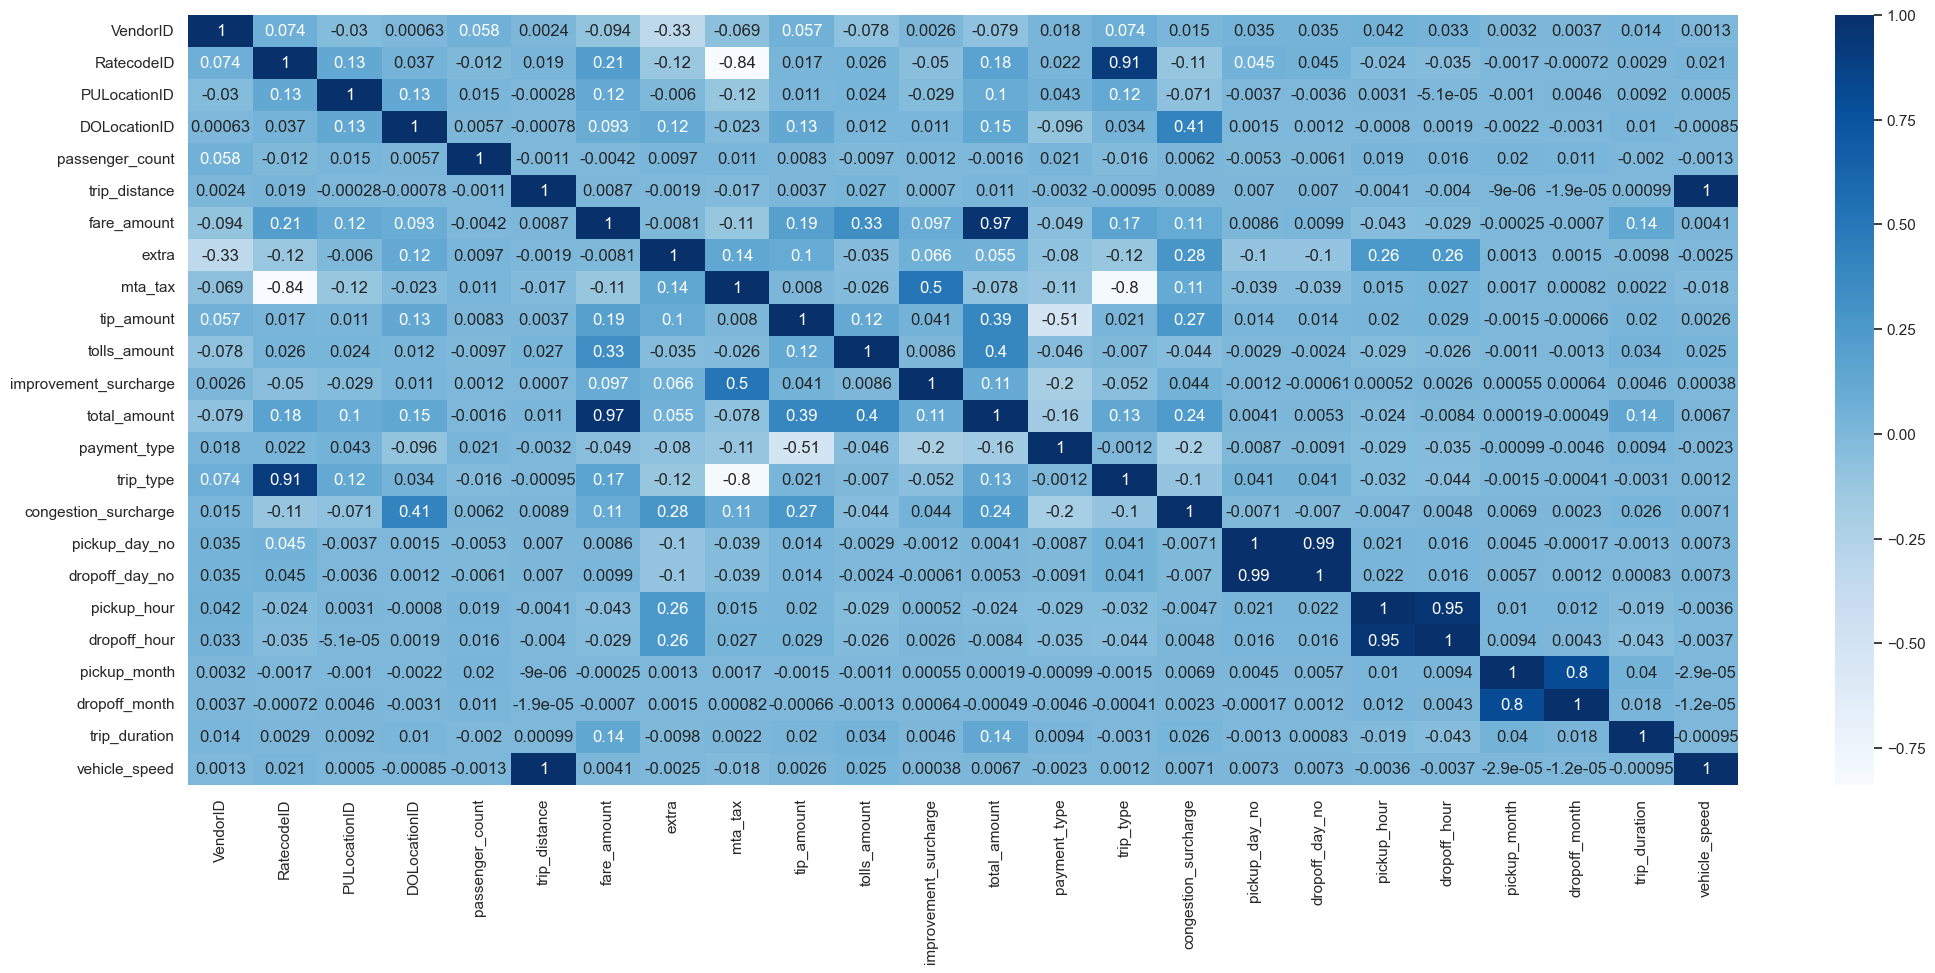

In [156]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

**Data Analysis**

**Univariate Analysis**

**Trip Duration**

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

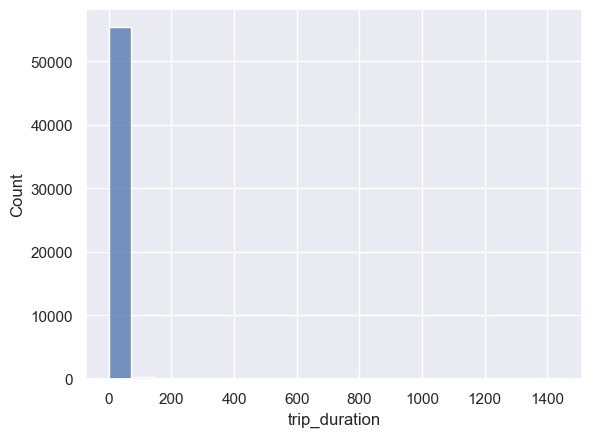

In [163]:
sns.histplot(df['trip_duration'],kde=False,bins=20)


**The histogram is really skewed as we can see.**

<AxesSubplot:xlabel='trip_duration'>

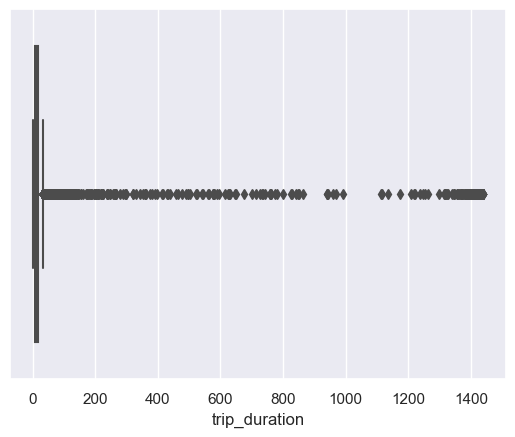

In [164]:
sns.boxplot(df['trip_duration'])

**Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively**

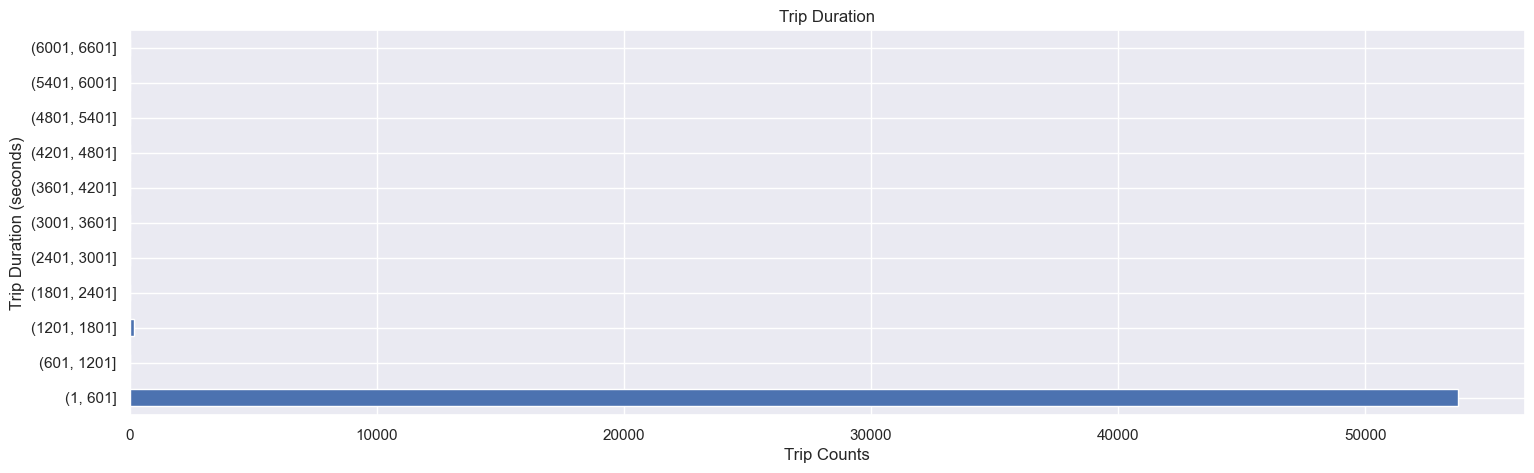

In [165]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

**I can observe that most of the trips took 0 - 10 mins to complete i.e. approx 600 secs. Some of the trips were 30 minutes long.**

**VendorID**

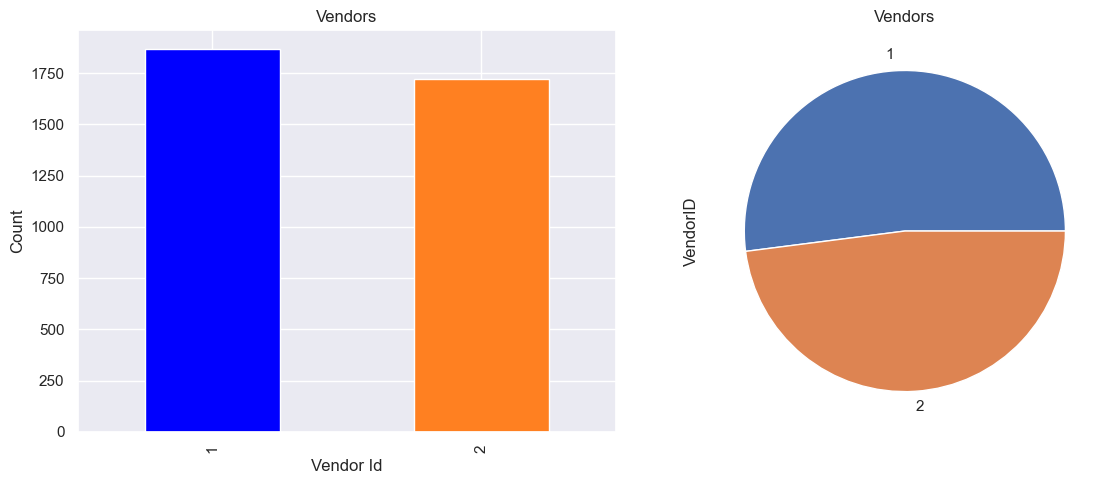

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['VendorID'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['VendorID'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

**Vendor 1 has more trips than Vendor 2 **

**Trip Distance**

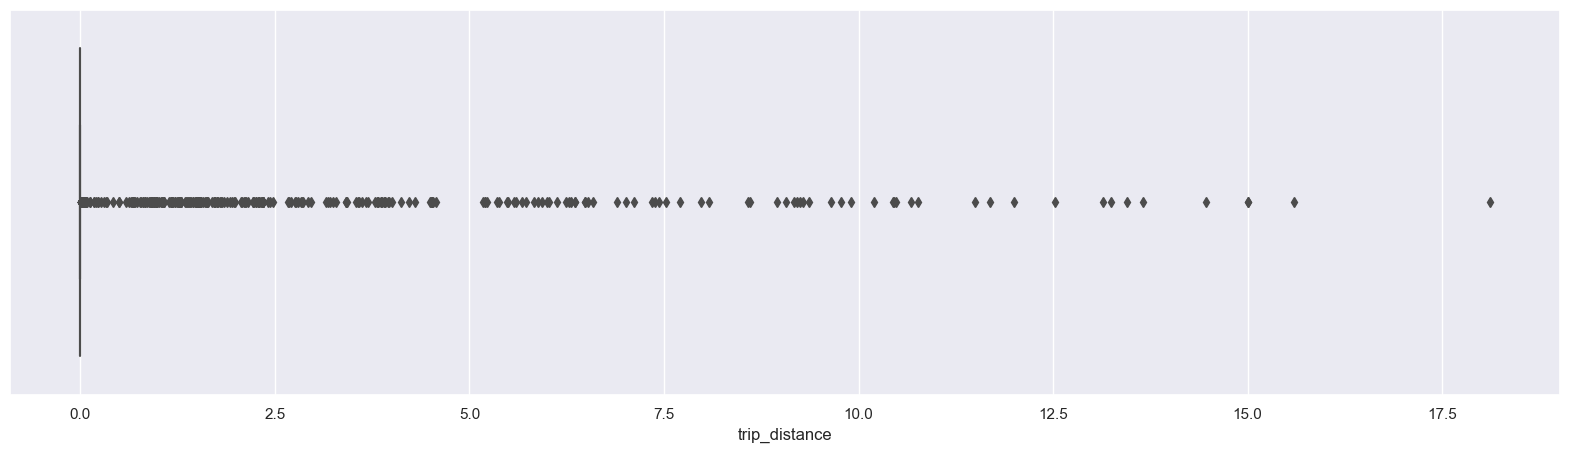

In [187]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.show()

In [206]:
print(f"There are {df.trip_distance[df.trip_distance == 0 ].count()} trip records with 0 miles distance")

There are 3274 trip records with 0 miles distance


3274 trips record with distance equal to 0. Below are some possible explanation for such records.
<br> *Customer changed mind and cancelled the journey just after accepting it.
<br> *Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
<br> *Issue with GPS tracker while the journey is being finished.
<br> *Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
<br> *Or some other issue with the software itself which a technical guy can explain

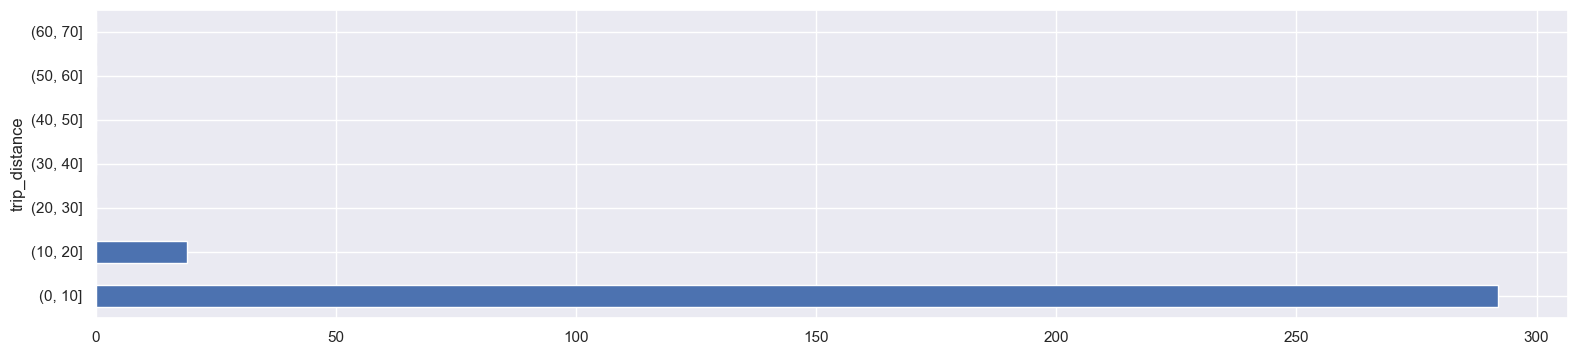

In [189]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()

From the above observation it is evident that most of the rides are completed between 1-10 miles with some of the rides with distances between 10-20miles. 

In [192]:
df_short = df[df.trip_distance <= 10].count()
df_long = df[df.trip_distance > 10].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")

Short Trips: 3566 records in total.
Long Trips: 19 records in total.


**Speed**

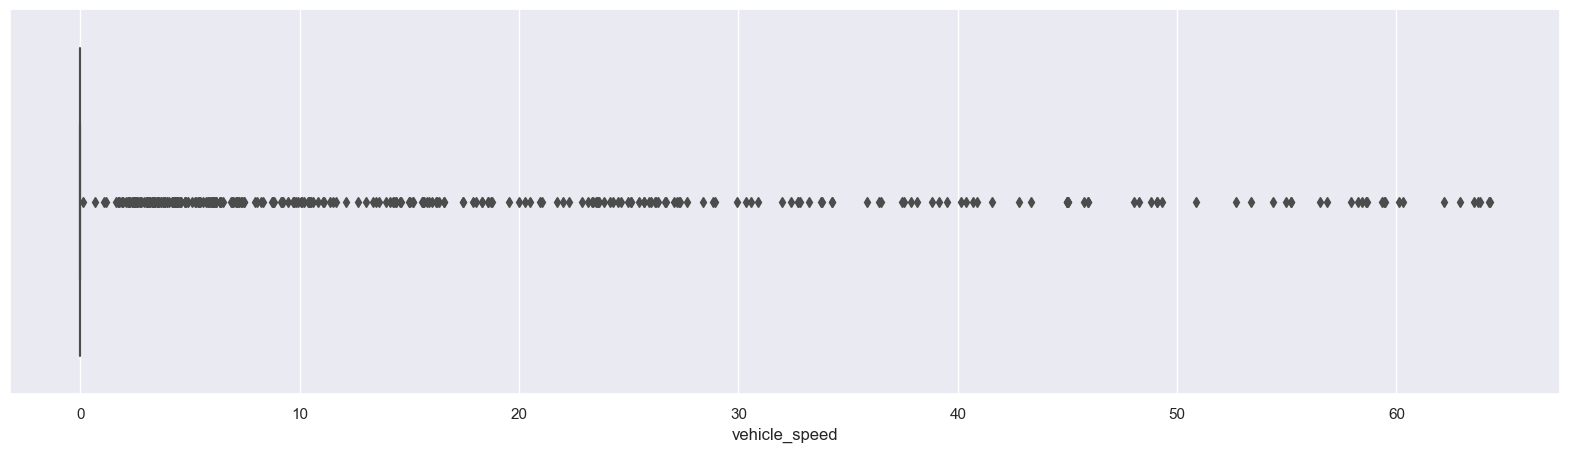

In [193]:
plt.figure(figsize = (20,5))
sns.boxplot(df.vehicle_speed)
plt.show()

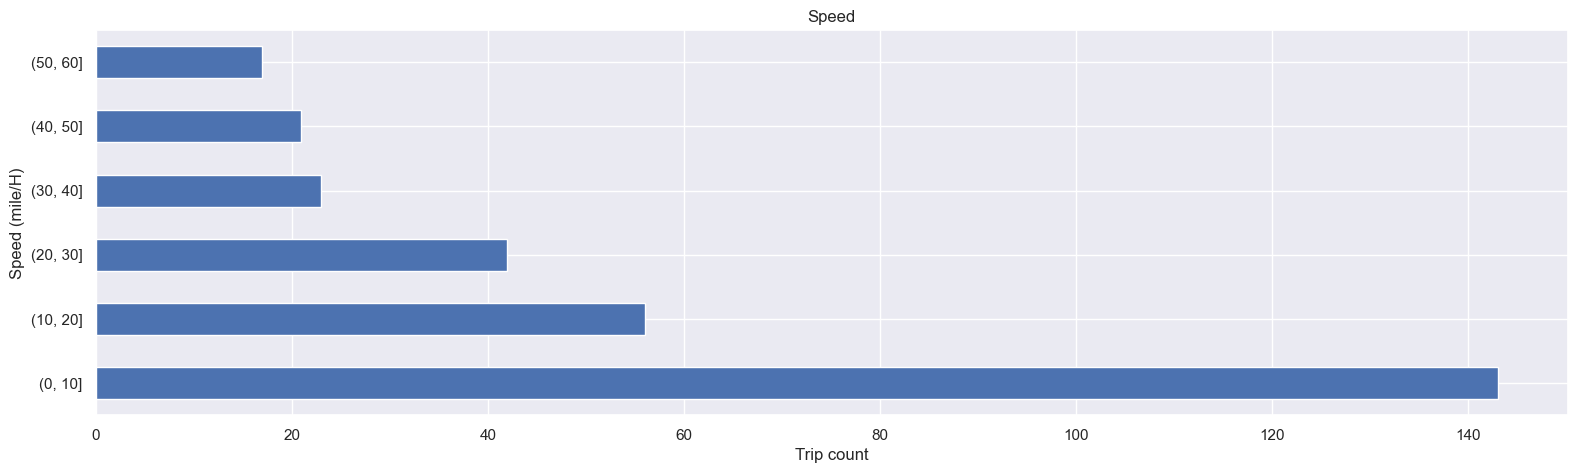

In [171]:
df = df[df.vehicle_speed <= 65]
df.vehicle_speed.groupby(pd.cut(df.vehicle_speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')
plt.show()

**It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 10-20 miles/H.**

**Passenger Count**

In [194]:
df.passenger_count.value_counts()

1.0    3379
2.0     150
5.0      28
3.0      14
6.0       8
4.0       6
Name: passenger_count, dtype: int64

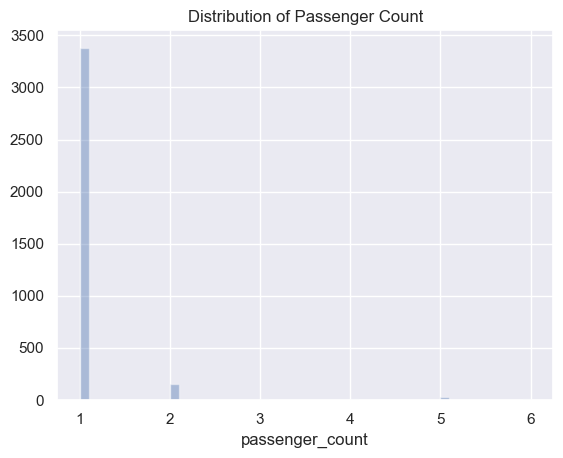

In [172]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

**Most of the passengers travel solo**

**Trips per Day**

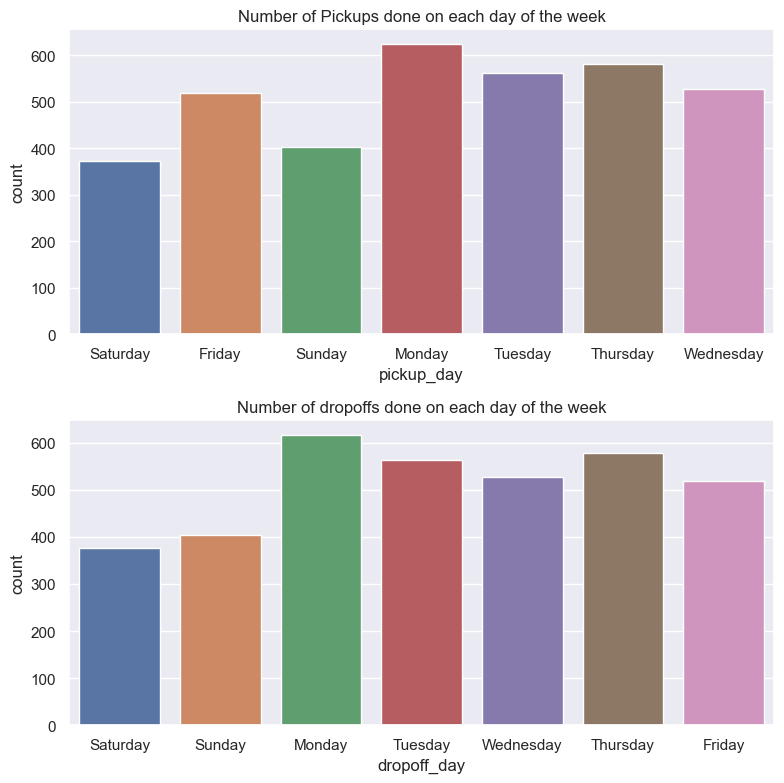

In [195]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,8))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

**hourwise pickup pattern across the week**

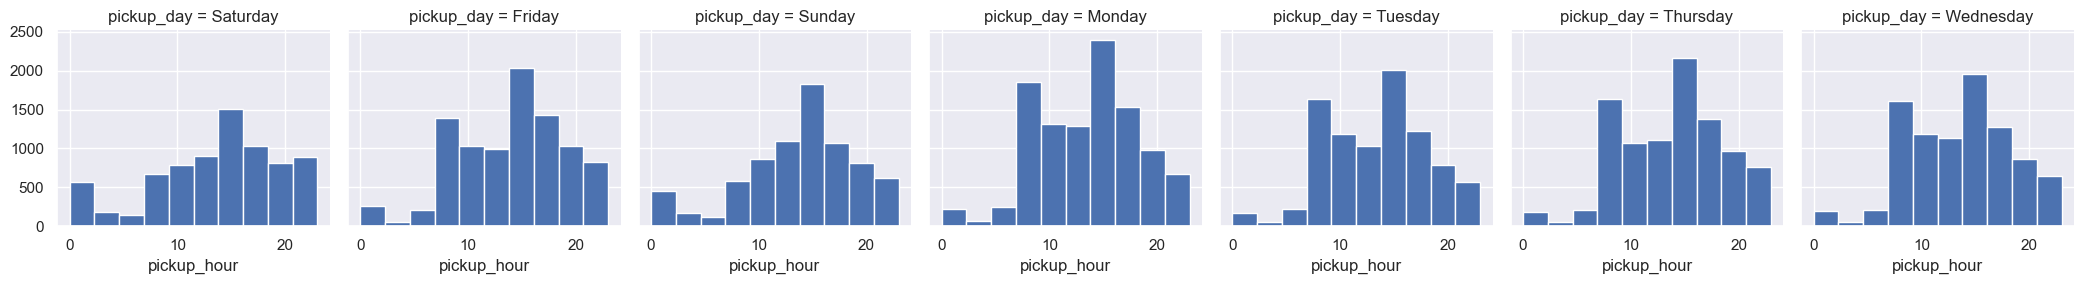

In [82]:
n = sns.FacetGrid(df, col='pickup_day')
n.map(plt.hist, 'pickup_hour')
plt.show()

<br> Early morning pickups seems consistently low
<br>Taxi pickups seems to be consistent across the week at 15 Hours.

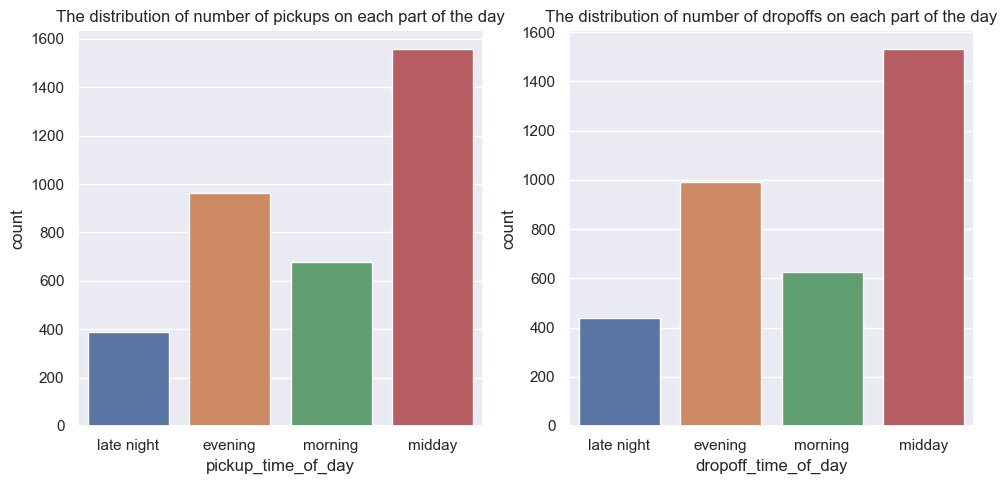

In [196]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_time_of_day',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_of_day',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

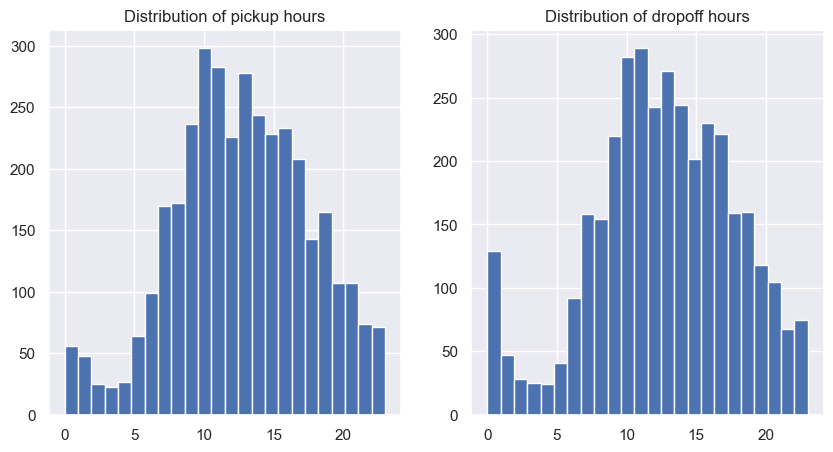

In [175]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['lpep_pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['lpep_dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [197]:
df['pickup_time_bins'] = pd.cut(x = df['pickup_hour'], bins=[1,6,9,12,15,18,21,24])
df['pickup_time_bins'].value_counts(normalize = True)

(9, 12]     0.231830
(12, 15]    0.215455
(15, 18]    0.167768
(6, 9]      0.166044
(18, 21]    0.108877
(1, 6]      0.068371
(21, 24]    0.041655
Name: pickup_time_bins, dtype: float64

<AxesSubplot:xlabel='pickup_time_bins', ylabel='count'>

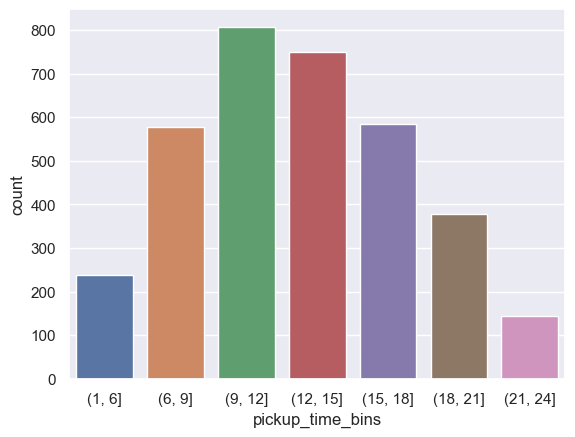

In [198]:
sns.countplot(x = 'pickup_time_bins' , data = df)

**Bivariate Analysis**

<AxesSubplot:xlabel='dropoff_time_of_day', ylabel='vehicle_speed'>

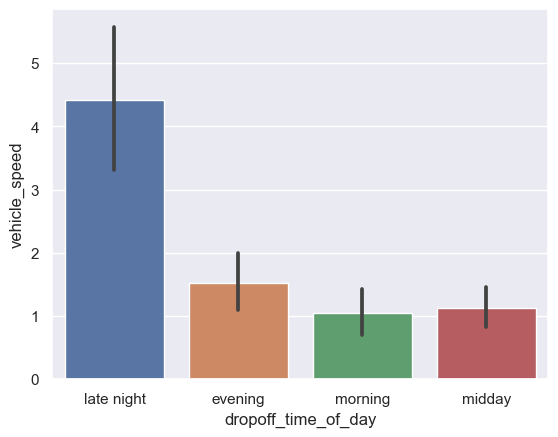

In [178]:
sns.barplot(y='vehicle_speed',x='dropoff_time_of_day',data=df,estimator=np.mean)

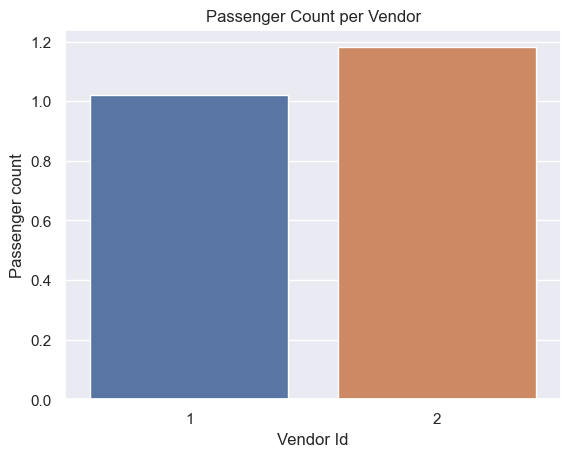

In [199]:
#passenger count per VendorID
group = df.groupby('VendorID').passenger_count.mean()
sns.barplot(group.index, group.values)
plt.ylabel('Passenger count')
plt.xlabel('Vendor Id')
plt.title('Passenger Count per Vendor')
plt.show()

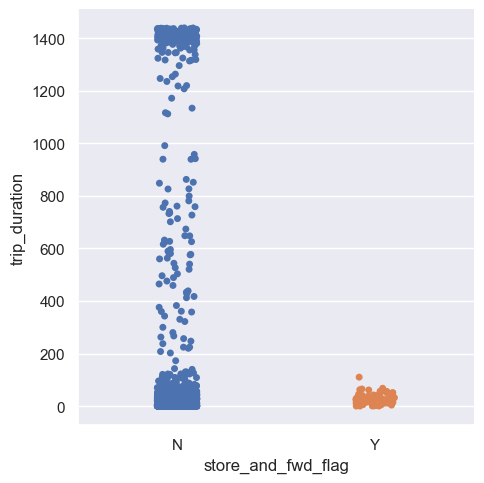

In [200]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

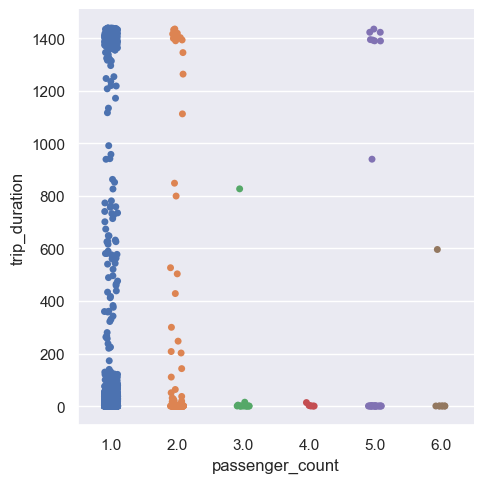

In [201]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind="strip")

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

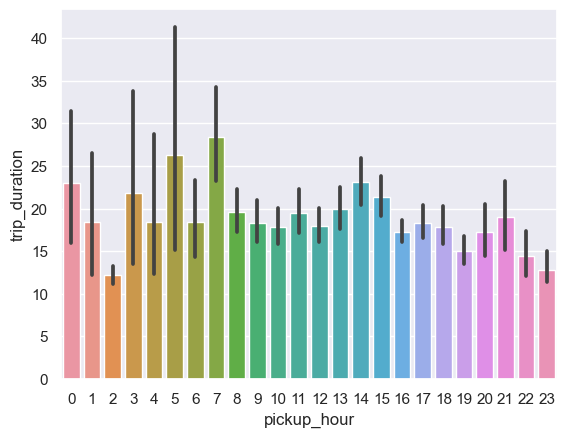

In [107]:
#trip_duration per hour
sns.barplot(x='pickup_hour',y='trip_duration',data=df)

<AxesSubplot:xlabel='pickup_time_of_day', ylabel='trip_duration'>

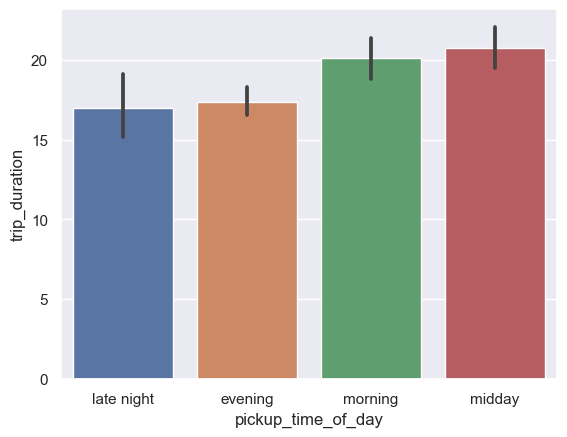

In [109]:
#Trip Duration per time of day
sns.barplot(x='pickup_time_of_day',y='trip_duration',data=df)

<AxesSubplot:xlabel='pickup_day', ylabel='trip_duration'>

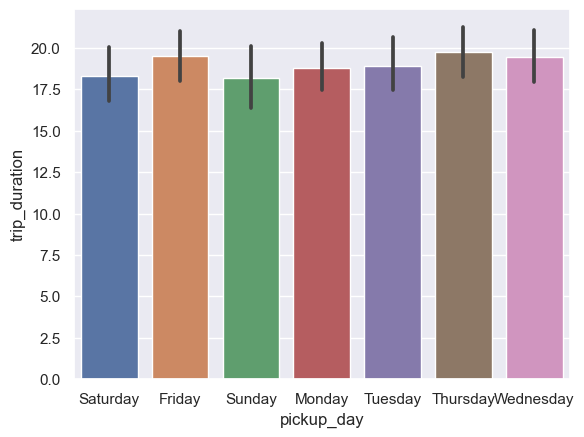

In [114]:
sns.barplot(x='pickup_day',y='trip_duration',data=df)

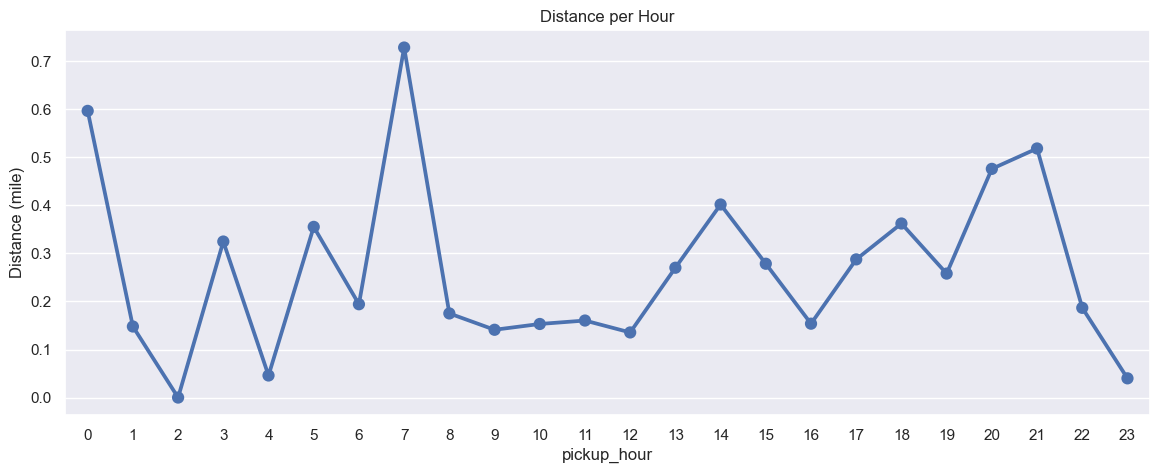

In [202]:
#trip_distance per hour
plt.figure(figsize = (14,5))
group = df.groupby('pickup_hour').trip_distance.mean()
sns.pointplot(group.index, group.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per Hour')
plt.show()

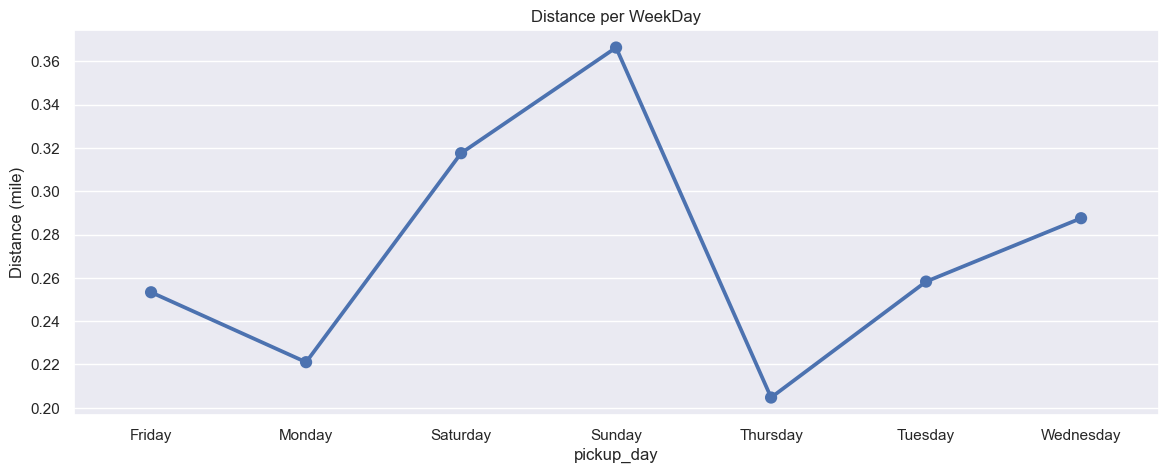

In [182]:
##trip_distance per weekday
plt.figure(figsize = (14,5))
group = df.groupby('pickup_day').trip_distance.mean()
sns.pointplot(group.index, group.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per WeekDay')
plt.show()

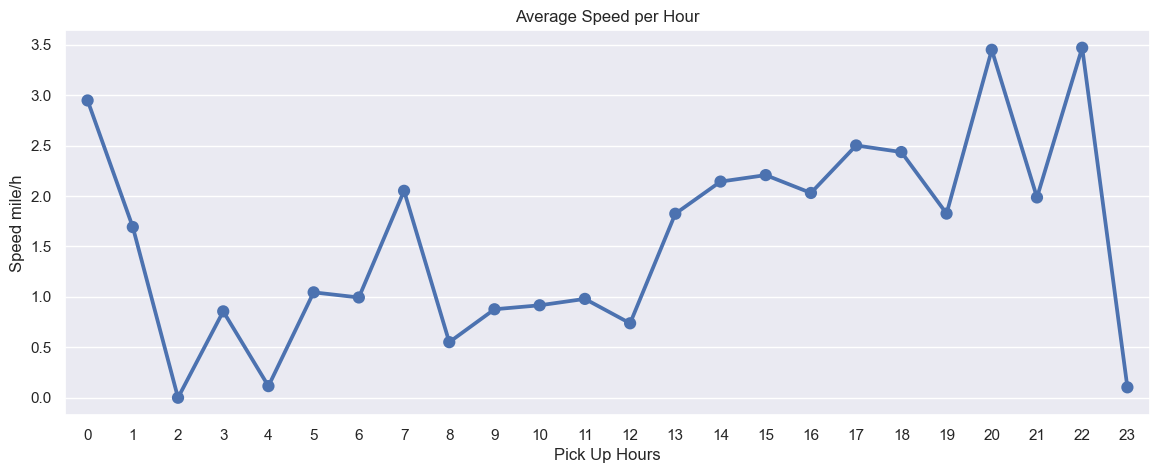

In [183]:
#Average vehicle_speed per hour
plt.figure(figsize = (14,5))
group = df.groupby('pickup_hour').vehicle_speed.mean()
sns.pointplot(group.index, group.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per Hour')
plt.show()